In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt 

/home/nemo/anaconda3/envs/BARF/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
img = torchvision.io.read_image("../data/cat.jpg")
C, H , W = img.shape

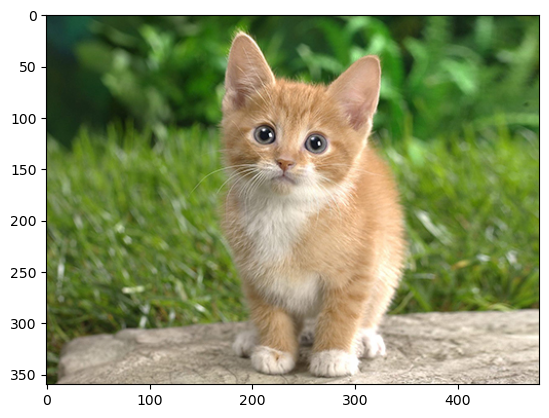

In [4]:
plt.imshow(img.permute(1,2,0))

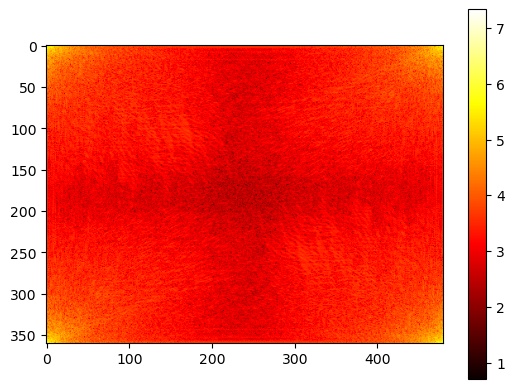

In [31]:
img_freq = torch.fft.fft2(img)
max_val = torch.max(torch.log10(torch.abs(img_freq)))
plt.imshow(torch.log10(torch.abs(img_freq.permute(1,2,0)))[...,0], cmap="hot")
plt.colorbar()


In [6]:
freq = torch.tensor([0]+[2**i for i in range(9)])
freq_basis = lambda coef, xs: torch.sum(torch.stack( c * torch.exp(2j*3.14159*f*xs) for f ,c in zip(freq, coef)), dim=0, keepdim=False)

In [46]:
dwn_freq_H = img_freq[:, freq,  :] # down sample exponentially along H dimension
dwn_freq_W = img_freq[:, :, freq]  # down sample exponentially along W dimension


In [47]:
w_H = torch.fft.ifft(dwn_freq_H, dim=2) # inverse fft along W dimension 
W_h = torch.fft.ifft(dwn_freq_W, dim=1) # inverse fft along W dimension 

In [58]:
basis_h = torch.stack(list(torch.exp(2j*3.141592*f/H * torch.arange(0,H)) for f in freq)).unsqueeze(-1).expand(3, -1,-1,W)
basis_w = torch.stack(list(torch.exp(2j*3.141592*f/W * torch.arange(0,W)) for f in freq)).unsqueeze(1).expand(3, -1,H,-1)
basis_h.shape, basis_w.shape,  w_H.shape, W_h.shape

(torch.Size([3, 10, 360, 480]),
 torch.Size([3, 10, 360, 480]),
 torch.Size([3, 10, 480]),
 torch.Size([3, 360, 10]))

In [65]:
restore = torch.real(torch.sum(w_H.unsqueeze(2)*basis_h ,dim=1,keepdim=False).permute(1,2,0))
print(restore.shape)
print(torch.max(restore), torch.min(restore))

torch.Size([360, 480, 3])
tensor(92412.3125) tensor(7547.8926)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


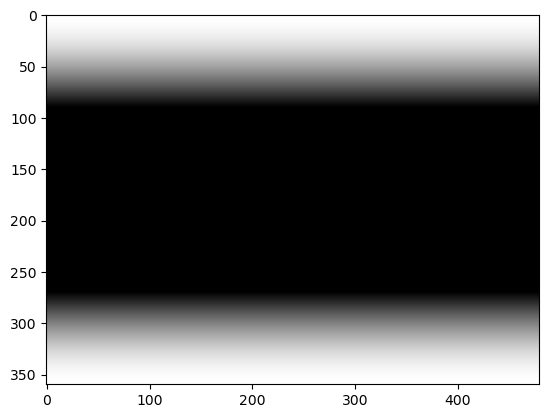

In [67]:
plt.imshow(torch.real(basis_h[:,1,:,:]).permute(1,2,0))